In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 

In [12]:
crime =pd.read_csv('crime_data.csv')

In [13]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [14]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [15]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [16]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [17]:
crime.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Normalization method

In [27]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [29]:
df_norm=norm_func(crime.iloc[:,:])

In [30]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


Create dendrogram

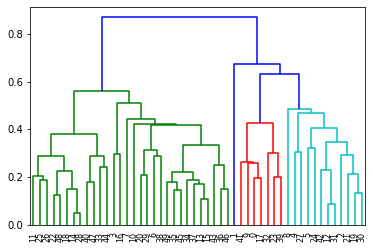

In [33]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'average' ))

In [31]:
hc= AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")

In [34]:
y_hc = hc.fit_predict(df_norm)
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])

In [35]:
y_hc

array([0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [37]:
crime['h_clusterid'] = Clusters

In [38]:
crime.sort_values('h_clusterid')


,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,0
42,12.7,201,80,25.5,0
41,13.2,188,59,26.9,0
39,14.4,279,48,22.5,0
32,13.0,337,45,16.1,0
31,11.1,254,86,26.1,0
30,11.4,285,70,32.1,0
27,12.2,252,81,46.0,0
23,16.1,259,44,17.1,0
21,12.1,255,74,35.1,0


In [40]:
crime.groupby('h_clusterid').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
h_clusterid,,,,
0,12.278947,254.842105,69.473684,28.357895
1,4.870000,114.433333,63.633333,15.943333
2,10.000000,263.000000,48.000000,44.500000


Inferences: we can tell from that cluster 0 has more murder mean followed by cluster 2 and 1. 
We can even tell Cluster 0 has more crimes and follwed by 2 and last place we can as cluster1